In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [99]:
df = pd.read_csv('/content/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [100]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [101]:
df.shape

(2290, 6)

In [102]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [103]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [104]:
df1 = df.drop(['Date'], axis=1)
df1.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [105]:
correlation = df1.corr()


In [106]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<ipython-input-107-219d2feb7d81>:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

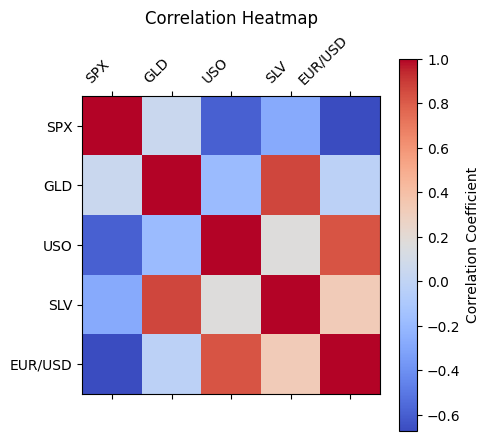

In [107]:
plt.figure(figsize=(8, 6))
ax = plt.matshow(correlation, cmap='coolwarm')
plt.colorbar(ax, label='Correlation Coefficient')

plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation.columns)), correlation.columns)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

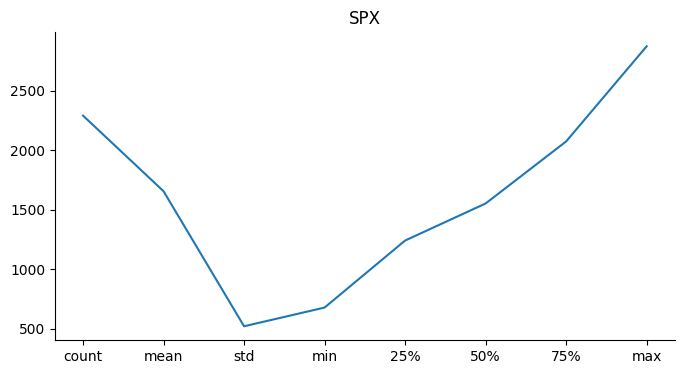

In [108]:
from matplotlib import pyplot as plt
_df_29['SPX'].plot(kind='line', figsize=(8, 4), title='SPX')
plt.gca().spines[['top', 'right']].set_visible(False)

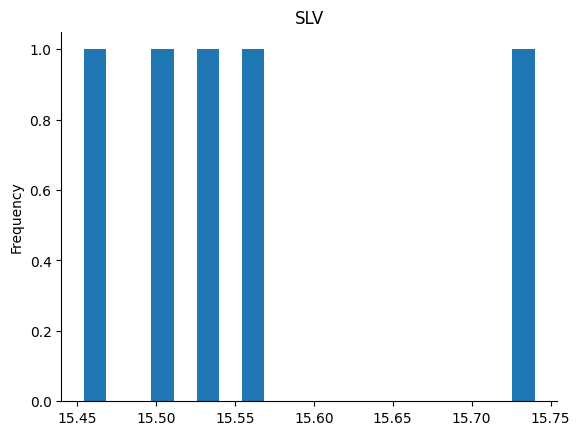

In [109]:
from matplotlib import pyplot as plt
_df_36['SLV'].plot(kind='hist', bins=20, title='SLV')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [110]:
df1.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [111]:
X = df1.drop(['EUR/USD'], axis=1)
y = df1['EUR/USD']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
print("Training Features:", X_train)
print("Training Labels:", y_train)
print("Testing Features:", X_test)
print("Testing Labels:", y_test)

Training Features:               SPX         GLD        USO        SLV
1572  2099.679932  116.339996  19.260000  15.750000
1467  2001.540039  120.730003  34.700001  18.260000
1574  2110.300049  115.279999  18.650000  15.540000
567   1089.469971  117.339996  34.740002  17.530001
1292  1802.479980  120.459999  33.820000  19.270000
...           ...         ...        ...        ...
1638  2095.840088  112.839996  19.660000  15.480000
1095  1426.189941  162.020004  33.369999  29.370001
1130  1502.420044  152.619995  33.430000  27.730000
1294  1807.229980  119.459999  33.189999  18.959999
860   1261.010010  169.399994  38.810001  31.610001

[1603 rows x 4 columns]
Training Labels: 1572    1.140472
1467    1.289108
1574    1.136674
567     1.284406
1292    1.355234
          ...   
1638    1.120787
1095    1.322769
1130    1.327316
1294    1.356779
860     1.341202
Name: EUR/USD, Length: 1603, dtype: float64
Testing Features:               SPX         GLD        USO        SLV
2178  2602.419

In [114]:
scaler = StandardScaler()


In [115]:
scaler.fit(X_train)

StandardScaler()

In [116]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
clf = RandomForestRegressor(n_estimators=100)  # n_estimators is the number of trees

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_predicted = clf.predict(X_test)

print("Predicted target values:", y_predicted)

Predicted target values: [1.18226299 1.37517187 1.3639051  1.53554451 1.05968985 1.08965521
 1.21480506 1.06565331 1.11920821 1.404503   1.2537978  1.30425807
 1.30478117 1.2513258  1.29350965 1.37458467 1.3585581  1.046688
 1.06002612 1.38504768 1.37763629 1.11143873 1.27527648 1.36695174
 1.11992772 1.23589205 1.20981298 1.24277711 1.47200677 1.34226639
 1.45535416 1.47753822 1.30769951 1.06727046 1.10207761 1.12023231
 1.311088   1.34495815 1.42113962 1.30916796 1.07258908 1.06546419
 1.16382263 1.15820777 1.1770586  1.12180381 1.30817949 1.0888093
 1.37168947 1.11705144 1.46806677 1.37207983 1.40730729 1.3110565
 1.36025055 1.36923913 1.40260071 1.35168384 1.4153326  1.19015838
 1.44967887 1.52455502 1.09235999 1.06251465 1.38855268 1.18017497
 1.12598574 1.25568184 1.33810162 1.26728716 1.31410917 1.31408897
 1.32938615 1.49411321 1.31541782 1.34939881 1.36625711 1.33143453
 1.11684767 1.25330545 1.29713373 1.09563416 1.41080065 1.55561258
 1.43351572 1.10495869 1.36163941 1.49165

In [118]:
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.00034578006705179035
R-squared: 0.9807468761704187


In [119]:
import joblib

joblib.dump(clf, 'random_forest_model.pkl')

['random_forest_model.pkl']